# Introduction to Regression with Neural Networks in TensorFlow
- There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

## Import TensorFlow


In [2]:
import tensorflow as tf
tf.__version__

'2.14.0'

## Creating a data to fit

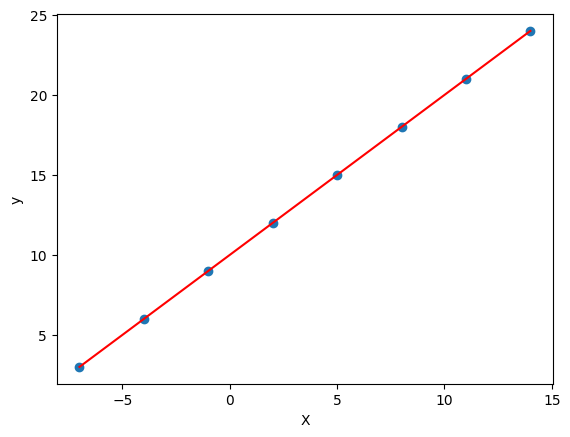

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24. ])

# Visualize
plt.scatter(X, y)
plt.plot(X, y, color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

- From graph, it can be seen that, y = X + 10.

X -> input features, independent variable
y -> output feature, dependent variable

## Input and output shapes


In [4]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

## Turn our Numpy array into tensors

In [6]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow


1.   Creating a model - define the input and output layers, as well as the hidden layers of a deep learning
2.   Compiling a model - define  the loss function ( in other words, the function that tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evalution metrics ( what we can use to interpret the performance of our model)
3. Fittin a model - letting the model try to find patterns betwene X & y (features and labels).



In [7]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

# Sequential groups a linear stack of layers into a tf.keras.Model.
# Sequential provides training and inference features on this model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # we have 1 input and want 1 output. that's why it's 1
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae => mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD => stochastic gradient descent
    metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 8.7378 - mae: 8.7378
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.6053 - mae: 8.6053
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 8.4728 - mae: 8.4728
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 8.3403 - mae: 8.3403
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 8.2078 - mae: 8.2078


In [8]:
# Check out X, y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Try and make a prediction using our model

In [9]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 123ms/step


array([[26.155607]], dtype=float32)

- Performance of our model is worse than shit. We have to improve it.

## Improve our model

we can improve our model, by altering the steps we took to create a model

1.   **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2.   **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model more examples to learn from)

In [13]:
# Let's rebuild our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 317ms/step - loss: 15.4579 - mae: 15.4579
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 15.1766 - mae: 15.1766
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.9228 - mae: 14.9228
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 14.7903 - mae: 14.7903
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.6578 - mae: 14.6578
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 14.5253 - mae: 14.5253
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3928 - mae: 14.3928
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2603 - mae: 14.2603
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1278 - mae: 14.1278
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9953 - mae: 13.9953
Epoch 11/100
1/1 [==============================] 

## Try and make a prediction using our new model

In [14]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 56ms/step


array([[29.616613]], dtype=float32)

- ***It's much better than before. Let's continue to improve our model***

In [16]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=10000)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0359 - mae: 0.0359
Epoch 7502/10000
1/1 [==============================] - 0s 11ms/step - loss: 1.7493 - mae: 1.7493
Epoch 7503/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.3693 - mae: 0.3693
Epoch 7504/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.4380 - mae: 1.4380
Epoch 7505/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.5992 - mae: 0.5992
Epoch 7506/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1418 - mae: 1.1418
Epoch 7507/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.8186 - mae: 0.8186
Epoch 7508/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.8598 - mae: 0.8598
Epoch 7509/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0282 - mae: 1.0282
Epoch 7510/10000
1/1 [==============================] - 0s 11ms/ste

In [1]:
y_pred = model.predict([17.])
y_pred

NameError: ignored